In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.layers.advanced_activations import LeakyReLU
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def figures(history, figure_name="plots"):
    """ method to visualize accuracies and loss vs epoch for training as well as testind data\n
        Argumets: history     = an instance returned by model.fit method\n
                  figure_name = a string representing file name to plots. By default it is set to "plots" \n
       Usage: hist = model.fit(X,y)\n              figures(hist) """
    from keras.callbacks import History
    if isinstance(history, History):
        hist = history.history
        epoch = history.epoch
        acc = hist['acc']
        loss = hist['loss']
        val_loss = hist['val_loss']
        val_acc = hist['val_acc']
        plt.figure(1)

        plt.subplot(221)
        plt.plot(epoch, acc)
        plt.title("Training accuracy vs Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")

        plt.subplot(222)
        plt.plot(epoch, loss)
        plt.title("Training loss vs Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")

        plt.subplot(223)
        plt.plot(epoch, val_acc)
        plt.title("Validation Acc vs Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Validation Accuracy")

        plt.subplot(224)
        plt.plot(epoch, val_loss)
        plt.title("Validation loss vs Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Validation Loss")
        plt.tight_layout()
        plt.savefig(figure_name)
    else:
        print("Input Argument is not an instance of class History")

/home/yaoxingliu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# train data

In [2]:
# generate 1000 numbers from -2pi to 2pi
# array: [1000, ]
x_train = np.linspace(-2*np.pi, 2*np.pi, 1000)
# reshape to matrix with [1000,1]
x_train = np.array(x_train).reshape((len(x_train), 1))

In [3]:
# generate a matrix with size [len(x),1], value in (0,1),array: [1000,1]
n = 0.1*np.random.rand(len(x_train), 1)

In [4]:
y_train = np.sin(x_train) + n

In [5]:
# 训练数据集：零均值单位方差
x_train = preprocessing.scale(x_train)
scaler = preprocessing.StandardScaler().fit(x_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
y_train = scaler.transform(y_train)
y_train

array([[ 4.67413835e-02],
       [ 9.83826817e-02],
       [ 3.14985187e-02],
       [ 7.52147487e-02],
       [ 7.76348338e-02],
       [ 1.42063969e-01],
       [ 1.71642490e-01],
       [ 1.56397742e-01],
       [ 1.56575848e-01],
       [ 2.08264338e-01],
       [ 1.77805729e-01],
       [ 1.46894485e-01],
       [ 1.83078232e-01],
       [ 2.26235095e-01],
       [ 2.13002910e-01],
       [ 1.98303528e-01],
       [ 2.75285905e-01],
       [ 3.02342841e-01],
       [ 3.03232393e-01],
       [ 3.17611174e-01],
       [ 2.49099549e-01],
       [ 2.93187240e-01],
       [ 3.36009335e-01],
       [ 2.88316469e-01],
       [ 3.46271761e-01],
       [ 3.28169943e-01],
       [ 3.98507489e-01],
       [ 3.42525174e-01],
       [ 4.05486374e-01],
       [ 4.55420279e-01],
       [ 4.67563046e-01],
       [ 3.85686711e-01],
       [ 4.00233126e-01],
       [ 4.31165714e-01],
       [ 4.77937965e-01],
       [ 4.36008031e-01],
       [ 4.50366562e-01],
       [ 4.67234803e-01],
       [ 5.0

In [7]:
print(x_train.shape)

(1000, 1)


# Test data

In [8]:
x_test = np.linspace(-5, 5, 2000)
x_test = np.array(x_test).reshape((len(x_test), 1))
y_test = np.sin(x_test)
print(x_test, "\n----------------------------\n",  y_test)

[[-5.       ]
 [-4.9949975]
 [-4.989995 ]
 ...
 [ 4.989995 ]
 [ 4.9949975]
 [ 5.       ]] 
----------------------------
 [[ 0.95892427]
 [ 0.96033129]
 [ 0.96171427]
 ...
 [-0.96171427]
 [-0.96033129]
 [-0.95892427]]


In [9]:
# 零均值单位方差
x_test = scaler.transform(x_test)
x_test

array([[-5.       ],
       [-4.9949975],
       [-4.989995 ],
       ...,
       [ 4.989995 ],
       [ 4.9949975],
       [ 5.       ]])

# prediction data

In [10]:
x_prd = np.linspace(-3, 3, 101)
x_prd = np.array(x_prd).reshape((len(x_prd), 1))
x_prd = scaler.transform(x_prd)
y_prd = np.sin(x_prd)
print(x_prd, "\n-------------\n", y_prd)


[[-3.00000000e+00]
 [-2.94000000e+00]
 [-2.88000000e+00]
 [-2.82000000e+00]
 [-2.76000000e+00]
 [-2.70000000e+00]
 [-2.64000000e+00]
 [-2.58000000e+00]
 [-2.52000000e+00]
 [-2.46000000e+00]
 [-2.40000000e+00]
 [-2.34000000e+00]
 [-2.28000000e+00]
 [-2.22000000e+00]
 [-2.16000000e+00]
 [-2.10000000e+00]
 [-2.04000000e+00]
 [-1.98000000e+00]
 [-1.92000000e+00]
 [-1.86000000e+00]
 [-1.80000000e+00]
 [-1.74000000e+00]
 [-1.68000000e+00]
 [-1.62000000e+00]
 [-1.56000000e+00]
 [-1.50000000e+00]
 [-1.44000000e+00]
 [-1.38000000e+00]
 [-1.32000000e+00]
 [-1.26000000e+00]
 [-1.20000000e+00]
 [-1.14000000e+00]
 [-1.08000000e+00]
 [-1.02000000e+00]
 [-9.60000000e-01]
 [-9.00000000e-01]
 [-8.40000000e-01]
 [-7.80000000e-01]
 [-7.20000000e-01]
 [-6.60000000e-01]
 [-6.00000000e-01]
 [-5.40000000e-01]
 [-4.80000000e-01]
 [-4.20000000e-01]
 [-3.60000000e-01]
 [-3.00000000e-01]
 [-2.40000000e-01]
 [-1.80000000e-01]
 [-1.20000000e-01]
 [-6.00000000e-02]
 [ 1.13686838e-16]
 [ 6.00000000e-02]
 [ 1.2000000

# Create model

In [11]:
model = Sequential()
model.add(Dense(100, kernel_initializer='uniform', input_dim=1))
model.add(Activation(LeakyReLU(alpha=0.01)))
# model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation(LeakyReLU(alpha=0.1)))
# model.add(Activation('relu'))

model.add(Dense(1))
# model.add(Activation(LeakyReLU(alpha=0.01)))
model.add(Activation('tanh'))

# model.compile(loss='mean_squared_error', optimizer="rmsprop", metrics=["accuracy"])
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=["accuracy"])

/home/yaoxingliu/anaconda3/lib/python3.6/site-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [12]:
# hist = model.fit(x_train, y_train, epochs=1000, batch_size=10, shuffle=True, verbose=0, validation_split=0.15)
hist = model.fit(x_test, y_test, batch_size=10, epochs=30, shuffle=True, verbose=1, validation_split=0.2)
# print(hist.history)

Train on 1600 samples, validate on 400 samples
Epoch 1/30
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1200 - acc: 0.0000e+00 - val_loss: 2.8024 - val_acc: 0.0000e+00
Epoch 2/30
1600/1600 [==============================] - 0s 212us/step - loss: 0.0294 - acc: 0.0000e+00 - val_loss: 2.7830 - val_acc: 0.0000e+00
Epoch 3/30
1600/1600 [==============================] - 0s 186us/step - loss: 0.0278 - acc: 0.0000e+00 - val_loss: 2.7494 - val_acc: 0.0000e+00
Epoch 4/30
1600/1600 [==============================] - 0s 182us/step - loss: 0.0264 - acc: 0.0000e+00 - val_loss: 2.6305 - val_acc: 0.0000e+00
Epoch 5/30
1600/1600 [==============================] - 0s 176us/step - loss: 0.0219 - acc: 0.0000e+00 - val_loss: 1.9918 - val_acc: 0.0000e+00
Epoch 6/30
1600/1600 [==============================] - 0s 180us/step - loss: 0.0136 - acc: 0.0000e+00 - val_loss: 0.8701 - val_acc: 0.0000e+00
Epoch 7/30
1600/1600 [==============================] - 0s 174us/step - loss: 0.0078 - acc:

In [13]:
score = model.evaluate(x_test, y_test, batch_size=10)
# score = model.evaluate(x_train, y_train, batch_size=10)

out = model.predict(x_prd, batch_size=1)

2000/2000 [==============================] - 0s 70us/step


# plot prediction data

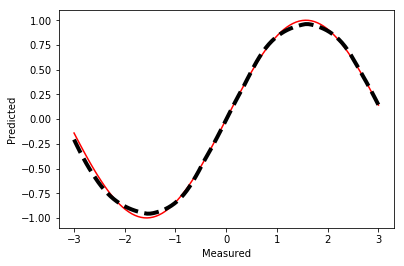

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.plot(x_prd, y_prd, 'r')
ax.plot(x_prd, out, 'k--', lw=4)

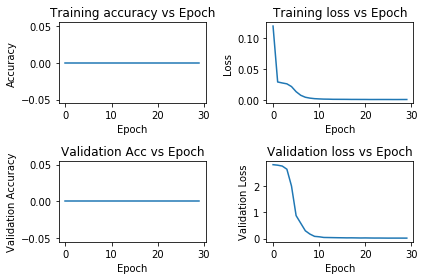

In [15]:
figures(hist)

In [16]:
print(score)

[0.004076683470694604, 0.0]
